## Data Cleaning, Trasformation and Sentiment Analysis

This notebook provides code for cleanign function and steps for scraped twitter data. 
Additionally, this notebook provides documentation around data trasformation such as creating scaled sentiment score and lagged sentiment value.

In [ ]:
#Package installations

#!pip install vaderSentiment 
#!pip install stop_words
#!pip install wordcloud
#!pip install textblob



import pandas as pd
import string 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import clear_output
clear_output()
import nltk
nltk.download('punkt')
from textblob import TextBlob

In [203]:
#Importing the scarped twitter data
df = pd.read_csv('Raw Tweeter Data Final .csv') 
df

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple'
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...
...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F..."
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ..."
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco..."


In [204]:
# converting Account verified into a binary number
df['Account Verified Number'] = df['Account Verified'][0]*1

#Creating a weighed score for Followe Count, Favourite Count and Retweets 
min1 = 0
max1 = 1000
df['Followe Count Scaled'] = df['Follower Count '].map(lambda x: (x - min1)/(max1-min1))
df['Followe Count Scaled'] = df['Followe Count Scaled'].clip(0, 1)

min2 = 0
max2 = 1000
df['Favorite Count Scaled'] = df['Favorite Count'].map(lambda x: (x - min2)/(max2-min2))
df['Favorite Count Scaled'] = df['Favorite Count Scaled'].clip(0, 1)

min3 = 0
max3 = 200
df['Retweets Scaled'] = df['Retweets'].map(lambda x: (x - min3)/(max3-min3))
df['Retweets Scaled'] = df['Retweets Scaled'].clip(0, 1)

#Last step is to take an average for those new scaled variables and import them into 
df['Sentiment Multiplier'] = df[['Followe Count Scaled', 'Favorite Count Scaled', 'Retweets Scaled', 'Account Verified Number']].mean(axis=1)

df



,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,Favorite Count Scaled,Retweets Scaled,Sentiment Multiplier
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,0.000,0.145,0.12900
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,0.000,1.000,0.50000
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,0.000,0.000,0.03175
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...,0,1.000,0.000,0.045,0.26125
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,0.072,0.000,1.000,0.26800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...,0,1.000,0.000,0.560,0.39000
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F...",0,0.200,0.001,0.000,0.05025
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ...",0,0.071,0.000,1.000,0.26775
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco...",0,0.157,0.000,1.000,0.28925


In [205]:
#Cleaning out special characters
#We want to get rid of the "@" text
def clean_text(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith("@")]
    return ' '.join(X_new)

df['Clean Text'] = df['Tweet Text'].apply(clean_text)


In [206]:
# Cleaning Funtion for punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [207]:
#applying the cleaning function to the text
df['Clean Tweet'] = df['Clean Text'].apply(remove_punctuations)

#Cleaning out any left over numbers, special characters or other words that are making our data dirty 
stop = (["b", "rt", "brt", "RT", "illegallynnxe2x80x9carizona", 'invexe2x80xa6', 'xf0x9fxa4xa3xf0x9fxa4xa3', "xe2", "x80", "x9carizona", "inve", "xa6", "n", "t", "co", "nhttps"])

#Cleaning out any stop words from the NLTK stop word dictionary and the above 'stop' dictionary with special word combinations that we dont want in our analysis
df['Final Clean']= df['Clean Tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
df["Final Clean"] = df['Final Clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

#Tokenizing the words
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['Final Clean']), axis=1)

df

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,Favorite Count Scaled,Retweets Scaled,Sentiment Multiplier,Clean Text,Clean Tweet,Final Clean,tokenized
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,0.000,0.145,0.12900,b'RT Thanks to the genius in NYC who told me t...,b RT Thanks to the genius in NYC who told me t...,thanks genius nyc told get noise cancelling ai...,"[thanks, genius, nyc, told, get, noise, cancel..."
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,0.000,1.000,0.50000,b'RT Apple Watch: \xe2\x80\x9cstand tf up.\xe2...,b RT Apple Watch xe2 x80 x9cstand tf up xe2...,apple watch x9cstand tf x9d https amndzfyqpb,"[apple, watch, x9cstand, tf, x9d, https, amndz..."
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,0.000,0.000,0.03175,b'@dan_abramov I miss the glowing Apple',b dan abramov I miss the glowing Apple,dan abramov i miss glowing apple,"[dan, abramov, i, miss, glowing, apple]"
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...,0,1.000,0.000,0.045,0.26125,b'RT She calls me Apple cause the way I be in ...,b RT She calls me Apple cause the way I be in ...,she calls apple cause way i cider ndon x99t un...,"[she, calls, apple, cause, way, i, cider, ndon..."
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,0.072,0.000,1.000,0.26800,b'RT Apple Watch: \xe2\x80\x9cstand tf up.\xe2...,b RT Apple Watch xe2 x80 x9cstand tf up xe2...,apple watch x9cstand tf x9d https amndzfyqpb,"[apple, watch, x9cstand, tf, x9d, https, amndz..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...,0,1.000,0.000,0.560,0.39000,b'RT I have a bipartisan bill to fix this. Can...,b RT I have a bipartisan bill to fix this Can...,i bipartisan bill fix can x99t get info gain m...,"[i, bipartisan, bill, fix, can, x99t, get, inf..."
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F...",0,0.200,0.001,0.000,0.05025,"b""African newspaper 'The Continent' reports #F...",b African newspaper The Continent reports F...,african newspaper the continent reports facebo...,"[african, newspaper, the, continent, reports, ..."
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ...",0,0.071,0.000,1.000,0.26775,"b""RT #TWICE's #Scientist is the World's Most W...",b RT TWICE s Scientist is the World s Most W...,twice s scientist world s most watched mv last...,"[twice, s, scientist, world, s, most, watched,..."
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco...",0,0.157,0.000,1.000,0.28925,"b""RT #BLACKPINK's #LISA becomes the 1st Kpop S...",b RT BLACKPINK s LISA becomes the 1st Kpop S...,blackpink s lisa becomes 1st kpop soloist hist...,"[blackpink, s, lisa, becomes, 1st, kpop, soloi..."


In [208]:
#The text data was still dirty, so we further created functions to clean out the data. 
def clean_text2(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith("https")]
    return ' '.join(X_new)

df["Final Clean"] = df["Final Clean"].apply(clean_text2)

def clean_text3(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith("2021")]
    return ' '.join(X_new)

df["Final Clean"] = df["Final Clean"].apply(clean_text3)


def clean_text4(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith("x")]
    return ' '.join(X_new)

df["Final Clean"] = df["Final Clean"].apply(clean_text4)



In [209]:
#Sentiment Analysis

vader = SentimentIntensityAnalyzer()

#Sentiment Analyzer function to get neutral, negative, positive and compound score for each row in the datadrame
def vader_scores(text, category):
  return vader.polarity_scores(text).get(category)

In [210]:

#Applying the above function to the dataframe 
#Compound score is the overall score that is based on the neg, neu and pos scores from vader analysis
#We are mostly interested in the compound score for our analysis

df["Negative_Score"] = df.apply(lambda row : vader_scores(df["Final Clean"][row.name], "neg"),axis=1)
df["Neutral_Score"] = df.apply(lambda row : vader_scores(df["Final Clean"][row.name], "neu"),axis=1)
df["Positive_Score"] = df.apply(lambda row : vader_scores(df["Final Clean"][row.name], "pos"),axis=1)
df["Compound_Score"] = df.apply(lambda row : vader_scores(df["Final Clean"][row.name], "compound"),axis=1)

#Creating a new variable to show if the tween was positive, nagative or neutral based on its compound score

df['Sentimet_Type'] = df['Compound_Score'].map(lambda x: 'Positive'  if (x > 0) else ('Negative' if (x < 0) else 'Neutral'))



In [211]:
#Applying min max scaled values and multiplying them by the sentiment score to get a weighed score 
df['Sentiment Score Scaled'] = df['Sentiment Multiplier'] * df['Compound_Score'] 
df

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Clean Text,Clean Tweet,Final Clean,tokenized,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,Sentimet_Type,Sentiment Score Scaled
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,...,b'RT Thanks to the genius in NYC who told me t...,b RT Thanks to the genius in NYC who told me t...,thanks genius nyc told get noise cancelling ai...,"[thanks, genius, nyc, told, get, noise, cancel...",0.115,0.701,0.185,0.2732,Positive,0.035243
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,...,b'RT Apple Watch: \xe2\x80\x9cstand tf up.\xe2...,b RT Apple Watch xe2 x80 x9cstand tf up xe2...,apple watch tf amndzfyqpb,"[apple, watch, x9cstand, tf, x9d, https, amndz...",0.000,1.000,0.000,0.0000,Neutral,0.000000
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,...,b'@dan_abramov I miss the glowing Apple',b dan abramov I miss the glowing Apple,dan abramov i miss glowing apple,"[dan, abramov, i, miss, glowing, apple]",0.242,0.758,0.000,-0.1531,Negative,-0.004861
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...,0,1.000,...,b'RT She calls me Apple cause the way I be in ...,b RT She calls me Apple cause the way I be in ...,she calls apple cause way i cider ndon unfollow,"[she, calls, apple, cause, way, i, cider, ndon...",0.000,1.000,0.000,0.0000,Neutral,0.000000
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,0.072,...,b'RT Apple Watch: \xe2\x80\x9cstand tf up.\xe2...,b RT Apple Watch xe2 x80 x9cstand tf up xe2...,apple watch tf amndzfyqpb,"[apple, watch, x9cstand, tf, x9d, https, amndz...",0.000,1.000,0.000,0.0000,Neutral,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...,0,1.000,...,b'RT I have a bipartisan bill to fix this. Can...,b RT I have a bipartisan bill to fix this Can...,i bipartisan bill fix can get info gain moment...,"[i, bipartisan, bill, fix, can, x99t, get, inf...",0.000,0.764,0.236,0.5267,Positive,0.205413
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F...",0,0.200,...,"b""African newspaper 'The Continent' reports #F...",b African newspaper The Continent reports F...,african newspaper the continent reports facebo...,"[african, newspaper, the, continent, reports, ...",0.318,0.682,0.000,-0.7906,Negative,-0.039728
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ...",0,0.071,...,"b""RT #TWICE's #Scientist is the World's Most W...",b RT TWICE s Scientist is the World s Most W...,twice s scientist world s most watched mv last...,"[twice, s, scientist, world, s, most, watched,...",0.000,1.000,0.000,0.0000,Neutral,0.000000
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco...",0,0.157,...,"b""RT #BLACKPINK's #LISA becomes the 1st Kpop S...",b RT BLACKPINK s LISA becomes the 1st Kpop S...,blackpink s lisa becomes 1st kpop soloist hist...,"[blackpink, s, lisa, becomes, 1st, kpop, soloi...",0.000,1.000,0.000,0.0000,Neutral,0.000000


In [212]:
#load the descriptions into textblob to get polarity and subjectivity of a tweet
desc_blob = [TextBlob(desc) for desc in df['Final Clean']]

#add the sentiment metrics to the dataframe
df['Polarity'] = [b.sentiment.polarity for b in desc_blob]
df['Subjectivity'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
df.head(3)

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Final Clean,tokenized,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,Sentimet_Type,Sentiment Score Scaled,Polarity,Subjectivity
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,...,thanks genius nyc told get noise cancelling ai...,"[thanks, genius, nyc, told, get, noise, cancel...",0.115,0.701,0.185,0.2732,Positive,0.035243,0.066667,0.092308
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,...,apple watch tf amndzfyqpb,"[apple, watch, x9cstand, tf, x9d, https, amndz...",0.000,1.000,0.000,0.0000,Neutral,0.000000,0.000000,0.000000
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,...,dan abramov i miss glowing apple,"[dan, abramov, i, miss, glowing, apple]",0.242,0.758,0.000,-0.1531,Negative,-0.004861,0.000000,0.000000


In [213]:
# Counting words in tokenized colomn, we are only interested in counting words that are used for sentiment analysis
df["Word Count"] = df['tokenized'].map(len)
df['Characters Count'] = df['Final Clean'].apply(len)
df


,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,Sentimet_Type,Sentiment Score Scaled,Polarity,Subjectivity,Word Count,Characters Count
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,...,0.115,0.701,0.185,0.2732,Positive,0.035243,0.066667,0.092308,14,79
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,...,0.000,1.000,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,7,25
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,...,0.242,0.758,0.000,-0.1531,Negative,-0.004861,0.000000,0.000000,6,32
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...,0,1.000,...,0.000,1.000,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,14,47
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,0.072,...,0.000,1.000,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...,0,1.000,...,0.000,0.764,0.236,0.5267,Positive,0.205413,0.000000,0.000000,14,74
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F...",0,0.200,...,0.318,0.682,0.000,-0.7906,Negative,-0.039728,-0.433333,0.400000,18,138
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ...",0,0.071,...,0.000,1.000,0.000,0.0000,Neutral,0.000000,0.250000,0.283333,16,86
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco...",0,0.157,...,0.000,1.000,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,15,101


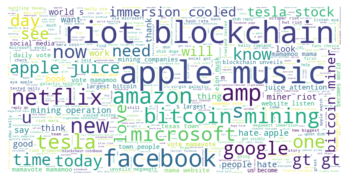

In [214]:
#Visualizing the results in an wordcloud
wc_string = ' '.join([sentance for sentance in df["Final Clean"]])
wordcloud = WordCloud(max_font_size=75, max_words=500, background_color = 'white', width=800, height =400).generate(wc_string)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [289]:
#Creating a lagged varible 

#First create a daily sentiment average for each company 

df1 = df.groupby(['Company', 'Date'], as_index=False).agg({'Sentiment Score Scaled': 'mean'})

# Now we want to create a lag variable for each company
df1 = df1.set_index(["Date", "Company"]) # index

shifted = df1.groupby(level="Company").shift(-1)
df1 = df1.join(shifted.rename(columns=lambda x: x+"_lag"))

  
#Now that we have the average value we need to map it out back to the original dataframe
df1 = pd.merge(df, df1, how="inner", on=["Company", "Date"])
df1




,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Positive_Score,Compound_Score,Sentimet_Type,Sentiment Score Scaled_x,Polarity,Subjectivity,Word Count,Characters Count,Sentiment Score Scaled_y,Sentiment Score Scaled_lag
0,Amazon,1.449900e+18,10/18/21,371,False,0,29,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0,0.371,...,0.185,0.2732,Positive,0.035243,0.066667,0.092308,14,79,0.015070,-0.011753
1,Amazon,1.449900e+18,10/18/21,1917,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,1.000,...,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,7,25,0.015070,-0.011753
2,Amazon,1.449900e+18,10/18/21,127,False,0,0,b'@dan_abramov I miss the glowing Apple',0,0.127,...,0.000,-0.1531,Negative,-0.004861,0.000000,0.000000,6,32,0.015070,-0.011753
3,Amazon,1.449900e+18,10/18/21,1157,False,0,9,b'RT @keekeexbabyy: She calls me Apple cause t...,0,1.000,...,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,14,47,0.015070,-0.011753
4,Amazon,1.449900e+18,10/18/21,72,False,0,5964,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0,0.072,...,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,7,25,0.015070,-0.011753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105354,Facebook,1.459760e+18,11/14/21,12876,False,0,112,b'RT @amyklobuchar: I have a bipartisan bill t...,0,1.000,...,0.236,0.5267,Positive,0.205413,0.000000,0.000000,14,74,0.020676,0.016537
105355,Facebook,1.459760e+18,11/14/21,200,False,1,0,"b""African newspaper 'The Continent' reports #F...",0,0.200,...,0.000,-0.7906,Negative,-0.039728,-0.433333,0.400000,18,138,0.020676,0.016537
105356,Facebook,1.459760e+18,11/14/21,71,False,0,996,"b""RT @WORLDMUSICAWARD: #TWICE's #Scientist is ...",0,0.071,...,0.000,0.0000,Neutral,0.000000,0.250000,0.283333,16,86,0.020676,0.016537
105357,Facebook,1.459760e+18,11/14/21,157,False,0,2520,"b""RT @WORLDMUSICAWARD: #BLACKPINK's #LISA beco...",0,0.157,...,0.000,0.0000,Neutral,0.000000,0.000000,0.000000,15,101,0.020676,0.016537


In [290]:
#Importing Stock Data for companies
stock = pd.read_csv('Stock Index Final.csv')
stock

,Company,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,Google,10/18/21,2824.270020,2859.975098,2824.270020,2859.209961,828200,0.0,0,GOOG
1,Google,10/19/21,2865.830078,2882.139893,2861.919922,2876.439941,765800,0.0,0,GOOG
2,Google,10/20/21,2884.449951,2884.955078,2838.239990,2848.300049,897000,0.0,0,GOOG
3,Google,10/21/21,2843.840088,2856.989990,2832.739990,2855.610107,742500,0.0,0,GOOG
4,Google,10/22/21,2807.020020,2831.169922,2743.409912,2772.500000,1509100,0.0,0,GOOG
...,...,...,...,...,...,...,...,...,...,...
229,Microsoft,11/8/21,337.299988,337.649994,334.440002,336.989990,20897000,0.0,0,MSFT
230,Microsoft,11/9/21,337.109985,338.720001,334.529999,335.950012,21307400,0.0,0,MSFT
231,Microsoft,11/10/21,334.570007,334.630005,329.920013,330.799988,25500900,0.0,0,MSFT
232,Microsoft,11/11/21,331.250000,333.769989,330.510010,332.429993,16849800,0.0,0,MSFT


In [218]:
#importing DJI and S&P500 data
stock2 = pd.read_csv('Market Stock.csv')
stock2

,Company,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,DJI,10/18/21,35221.019530,35327.570310,35035.941410,35258.609380,312640000,0,0,^DJI
1,DJI,10/19/21,35325.371090,35462.679690,35290.121090,35457.308590,278510000,0,0,^DJI
2,DJI,10/20/21,35475.160160,35669.691410,35465.710940,35609.339840,265750000,0,0,^DJI
3,DJI,10/21/21,35520.320310,35612.359380,35442.531250,35603.078130,298390000,0,0,^DJI
4,DJI,10/22/21,35607.718750,35765.019530,35533.949220,35677.019530,346290000,0,0,^DJI
5,DJI,10/23/21,35607.718750,35765.019530,35533.949220,35677.019530,346290000,0,0,^DJI
6,DJI,10/24/21,35607.718750,35765.019530,35533.949220,35677.019530,346290000,0,0,^DJI
7,DJI,10/25/21,35692.621090,35787.039060,35629.371090,35741.148440,267220000,0,0,^DJI
8,DJI,10/26/21,35791.050780,35892.921880,35734.730470,35756.878910,321910000,0,0,^DJI
9,DJI,10/27/21,35835.429690,35835.429690,35490.429690,35490.691410,354180000,0,0,^DJI


In [291]:
#Merging the two lists together on date and company name 

merged = pd.merge(df1,stock,how='inner',left_on=['Company','Date'],right_on=['Company','Date'])
merged

data = pd.concat([merged, stock2])
data

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Sentiment Score Scaled_y,Sentiment Score Scaled_lag,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,Amazon,1.449900e+18,10/18/21,371.0,False,0.0,29.0,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0.0,0.371,...,0.01507,-0.011753,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN
1,Amazon,1.449900e+18,10/18/21,1917.0,False,0.0,5964.0,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0.0,1.000,...,0.01507,-0.011753,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN
2,Amazon,1.449900e+18,10/18/21,127.0,False,0.0,0.0,b'@dan_abramov I miss the glowing Apple',0.0,0.127,...,0.01507,-0.011753,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN
3,Amazon,1.449900e+18,10/18/21,1157.0,False,0.0,9.0,b'RT @keekeexbabyy: She calls me Apple cause t...,0.0,1.000,...,0.01507,-0.011753,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN
4,Amazon,1.449900e+18,10/18/21,72.0,False,0.0,5964.0,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0.0,0.072,...,0.01507,-0.011753,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,S&P 500,NaN,11/8/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4701.479980,4714.919922,4694.390137,4701.700195,3465720000,0.0,0,^GSPC
48,S&P 500,NaN,11/9/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4707.250000,4708.529785,4670.870117,4685.250000,3110230000,0.0,0,^GSPC
49,S&P 500,NaN,11/10/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4670.259766,4684.850098,4630.859863,4646.709961,3581630000,0.0,0,^GSPC
50,S&P 500,NaN,11/11/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4659.390137,4664.549805,4648.310059,4649.270020,2623140000,0.0,0,^GSPC


In [292]:
#def to calculate if the stock price increased or decreased on that day 
data['Change'] = data["Close"] - data["Open"]


def change(x):
    if x > 0: 
        return 1 
    else: 
        return 0
        
data["New_Change"] = data["Change"].apply(change)
data

,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Account Verified Number,Followe Count Scaled,...,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Change,New_Change
0,Amazon,1.449900e+18,10/18/21,371.0,False,0.0,29.0,b'RT @JennaEllisEsq: Thanks to the @Apple geni...,0.0,0.371,...,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN,58.379883,1
1,Amazon,1.449900e+18,10/18/21,1917.0,False,0.0,5964.0,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0.0,1.000,...,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN,58.379883,1
2,Amazon,1.449900e+18,10/18/21,127.0,False,0.0,0.0,b'@dan_abramov I miss the glowing Apple',0.0,0.127,...,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN,58.379883,1
3,Amazon,1.449900e+18,10/18/21,1157.0,False,0.0,9.0,b'RT @keekeexbabyy: She calls me Apple cause t...,0.0,1.000,...,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN,58.379883,1
4,Amazon,1.449900e+18,10/18/21,72.0,False,0.0,5964.0,b'RT @ThereGoesTonio: Apple Watch: \xe2\x80\x9...,0.0,0.072,...,3388.360107,3449.169922,3385.100098,3446.739990,3174100,0.0,0,AMZN,58.379883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,S&P 500,NaN,11/8/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4701.479980,4714.919922,4694.390137,4701.700195,3465720000,0.0,0,^GSPC,0.220215,1
48,S&P 500,NaN,11/9/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4707.250000,4708.529785,4670.870117,4685.250000,3110230000,0.0,0,^GSPC,-22.000000,0
49,S&P 500,NaN,11/10/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4670.259766,4684.850098,4630.859863,4646.709961,3581630000,0.0,0,^GSPC,-23.549805,0
50,S&P 500,NaN,11/11/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4659.390137,4664.549805,4648.310059,4649.270020,2623140000,0.0,0,^GSPC,-10.120117,0


In [293]:
#Exporing the data

#data.to_csv("Tweeter_Exploratory_Data.csv")
data.to_csv("Twitter_Exploratory_Data_Lagged_V2.csv")